# Map watertagged regions for RCP8.5 2100

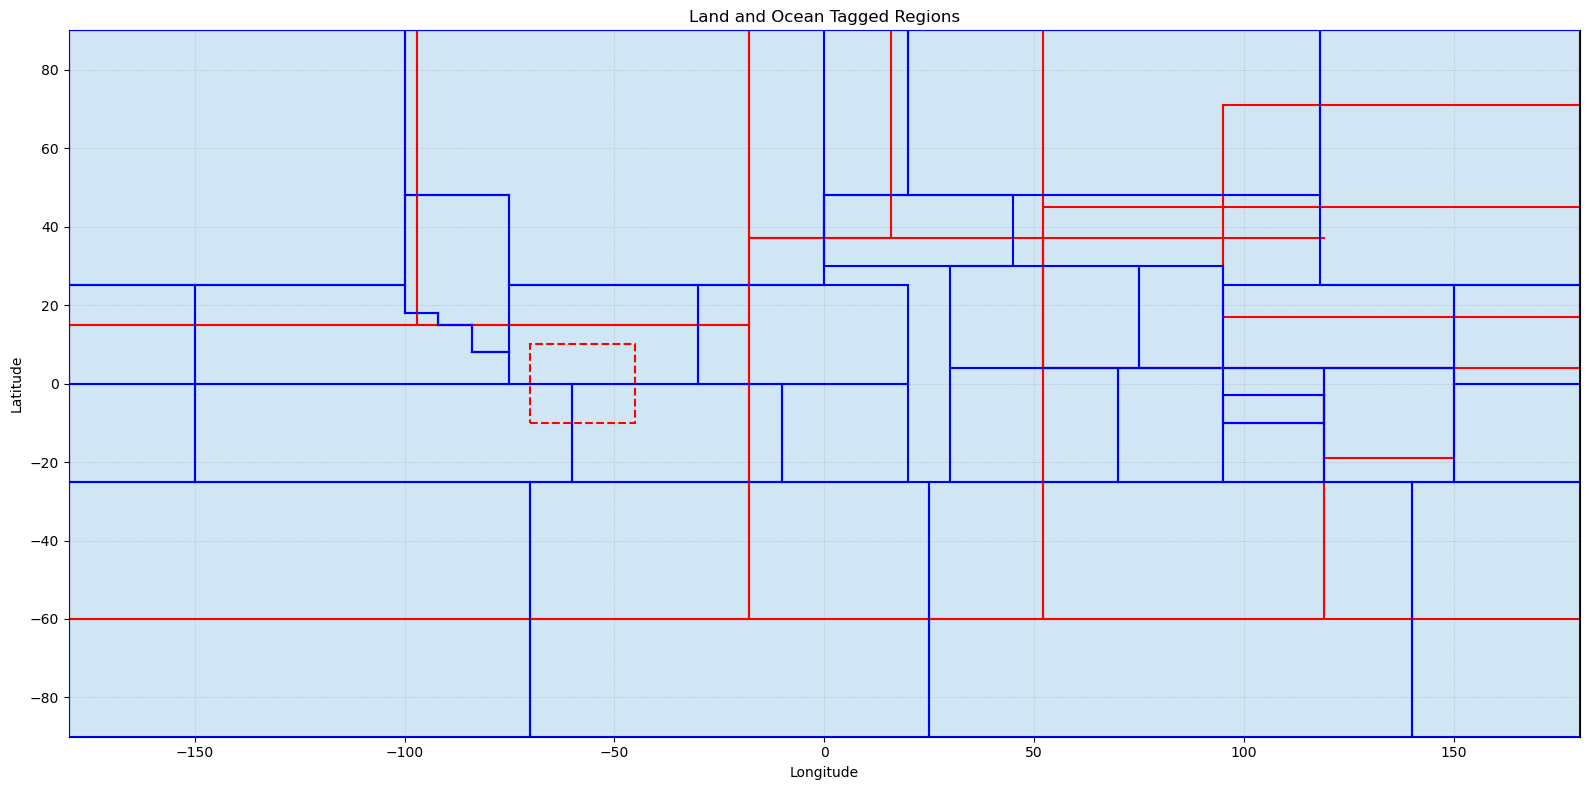

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/glade/u/home/aflaim/ESMplot')
from ESMplot.watertagging.tagged_regions_RCP85 import draw_land_tags_rcp85,draw_ocean_tags_rcp85

# Create a world map figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Land and Ocean Tagged Regions')

# Optional: Add a light background for land/ocean
ax.set_facecolor('#d0e6f5')  # light blue ocean
ax.grid(True, which='both', linestyle=':', linewidth=0.5)

# Set up border style parameters
line_width = 1.5
major_style = '-'
minor_style = '--'
color = 'red'
zorder = 3

# Draw all land tags (tags 0–12)
for i in range(13):
    draw_land_tags_rcp85(i, ax, line_width, major_style, minor_style, color, zorder)

# Draw all ocean tags (tags 13–39)
for i in range(13, 40):
    draw_ocean_tags_rcp85(i, ax, line_width, major_style, minor_style, 'blue', zorder)

# Finalize and show the plot
plt.tight_layout()
plt.show()


In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
sys.path.append('/glade/u/home/aflaim/ESMplot')

from ESMplot.watertagging.tagged_regions_RCP85 import draw_land_tags, draw_ocean_tags

# Setup figure with two panels (land top, ocean bottom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12),
                               subplot_kw={'projection': ccrs.PlateCarree()})
for ax in [ax1, ax2]:
    ax.set_global()
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
    ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

# Style parameters
line_width = 1.5
major_style = '-'
minor_style = '--'
zorder = 5

# Plot land tags in top panel
for i in range(13):
    draw_land_tags(i, ax1, line_width, major_style, minor_style, 'red', zorder)

# Plot ocean tags in bottom panel
for i in range(13, 40):
    draw_ocean_tags(i, ax2, line_width, major_style, minor_style, 'blue', zorder)

# Set titles
ax1.set_title("Land Tagged Regions", fontsize=14)
ax2.set_title("Ocean Tagged Regions", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/glade/work/aflaim/conda-envs/ESMplot_py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/glade/derecho/scratch/aflaim/tmp/ipykernel_82031/1162578145.py", line 7, in <module>
    from ESMplot.watertagging.tagged_regions_RCP85 import draw_land_tags, draw_ocean_tags
ImportError: cannot import name 'draw_land_tags' from 'ESMplot.watertagging.tagged_regions_RCP85' (/glade/u/home/aflaim/ESMplot/ESMplot/watertagging/tagged_regions_RCP85.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/glade/work/aflaim/conda-envs/ESMplot_py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2170, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/glade/work/aflaim/conda-envs/ESMplot_py3.10/lib/python3.10/site-packages/IPython/core/ultratb.py", line

# Testing individual region definitions

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.lines as lines

## Europe

In [ ]:
def plot_test_patch(rlats, rlatn, rlonw, rlone,
                    lw=2, linestyle='-', color='red', zorder=5):
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set map extent and features
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
    ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

    # Compute width and height with crossing checks
    dx = abs(rlone - rlonw) if (rlone * rlonw >= 0) else abs(rlone) + abs(rlonw)
    dy = abs(rlatn - rlats) if (rlatn * rlats >= 0) else abs(rlatn) + abs(rlats)

    # Draw the rectangle
    ax.add_patch(Rectangle((rlonw, rlats), dx, dy,
                           transform=ccrs.PlateCarree(),
                           facecolor='none', edgecolor=color,
                           linestyle=linestyle, linewidth=lw,
                           zorder=zorder))

    ax.set_title("Tagged Region Test", fontsize=14)
    plt.tight_layout()
    plt.show()

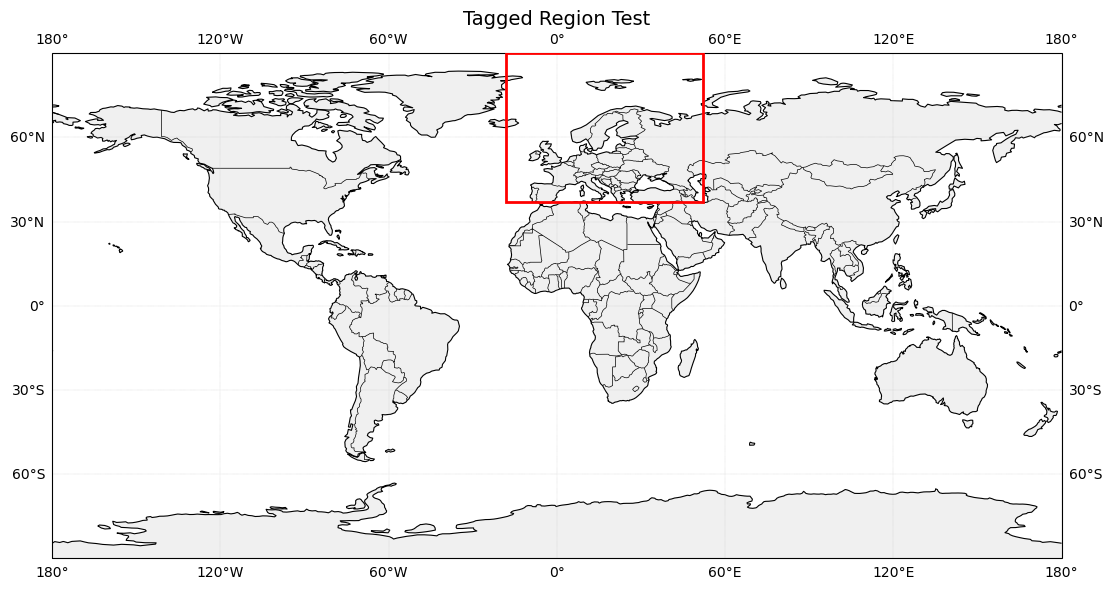

In [4]:
plot_test_patch(rlats=37, rlatn=90, rlonw=-18, rlone=52)

## NASA

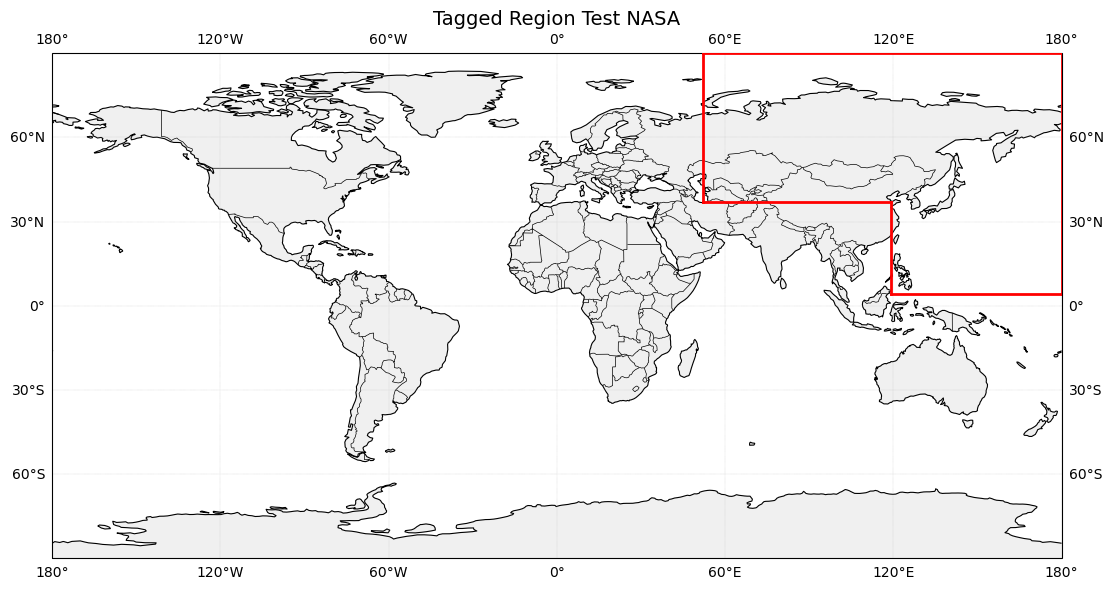

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent and features
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

major = "-"
lw = 2
color='red'
zorder=5

# NASA
rlats = 37   # Western border 1
rlatn = 90 
rlonw = 52 
rlone = 52 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4   # Western border 2
rlatn = 37 
rlonw = 119 
rlone = 119 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4    # Eastern border
rlatn = 90
rlonw = 180 
rlone = 180 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 37    # Southern border part 1
rlatn = 37 
rlonw = 52 
rlone = 119 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4    # Southern border part 2
rlatn = 4  
rlonw = 119 
rlone = 180
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 90    # Northern border
rlatn = 90  
rlonw = 52
rlone = 180
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))

ax.set_title("Tagged Region Test NASA", fontsize=14)
plt.tight_layout()
plt.show()

## SASA

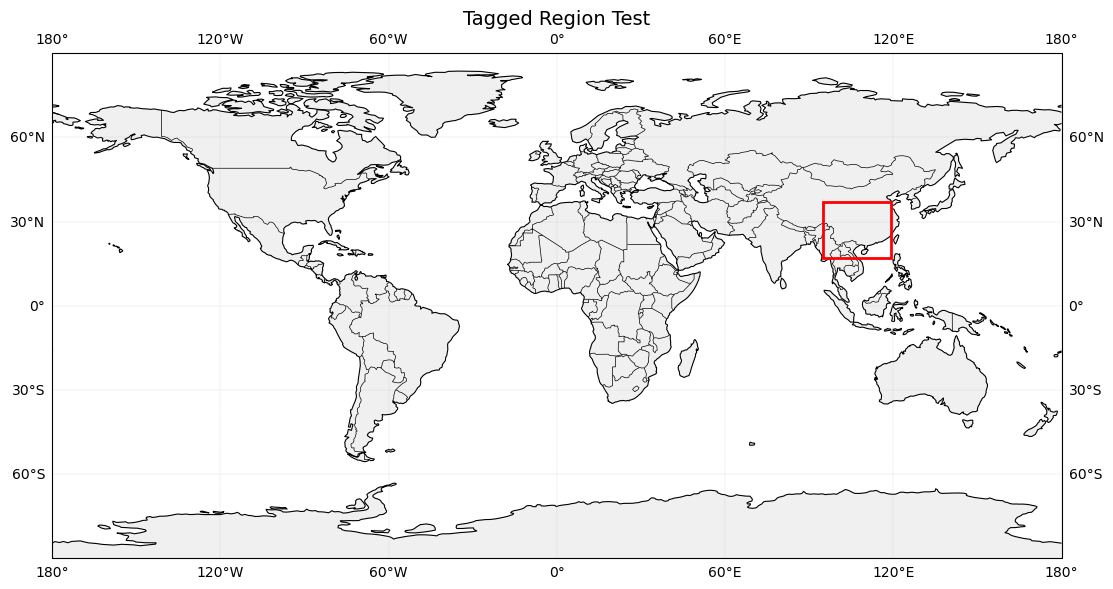

In [16]:
# 8. Southeast Asia
rlats = 17
rlatn = 37
rlonw = 95
rlone = 119

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

## SLCB

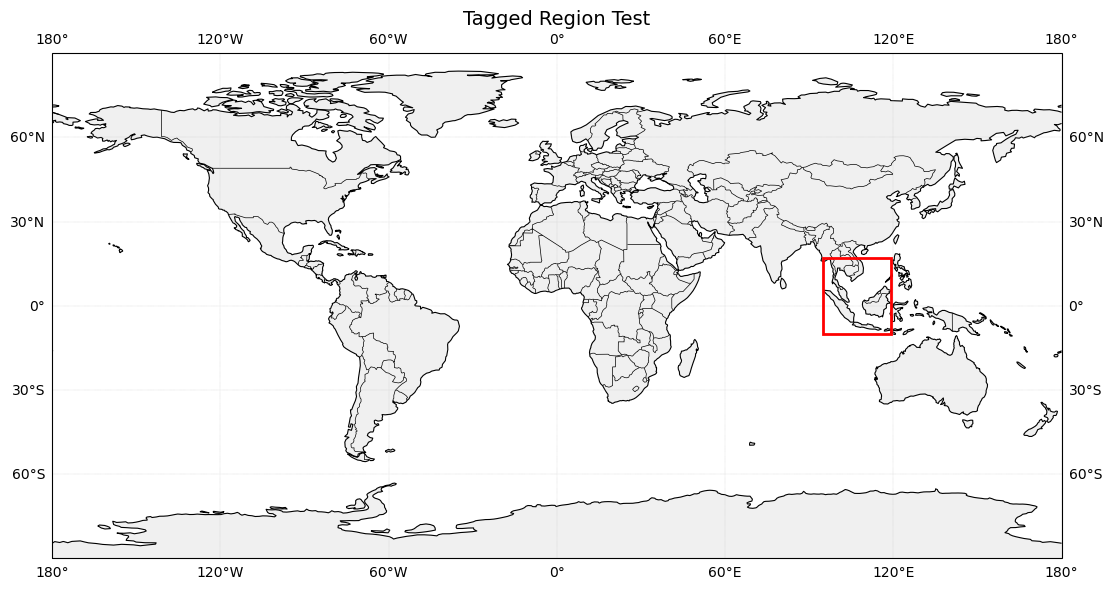

In [17]:
# 10. Sundaland combined 
rlats = -10
rlatn = 17
rlonw = 95  #-180
rlone = 119 #-180

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

## INDA

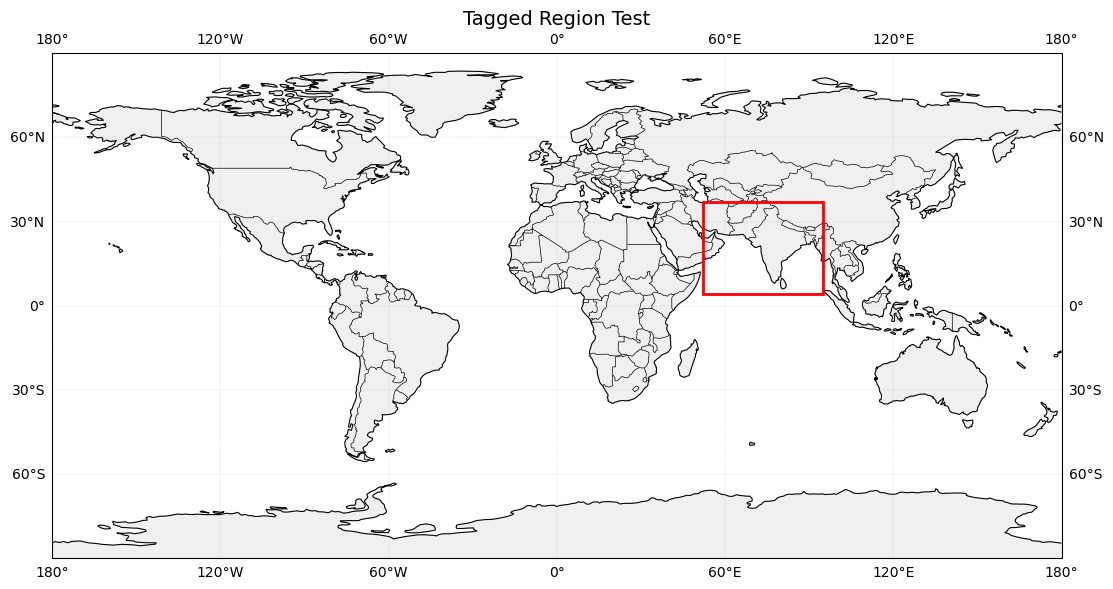

In [18]:
# 7. India
rlats = 4
rlatn = 37
rlonw = 52
rlone = 95

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

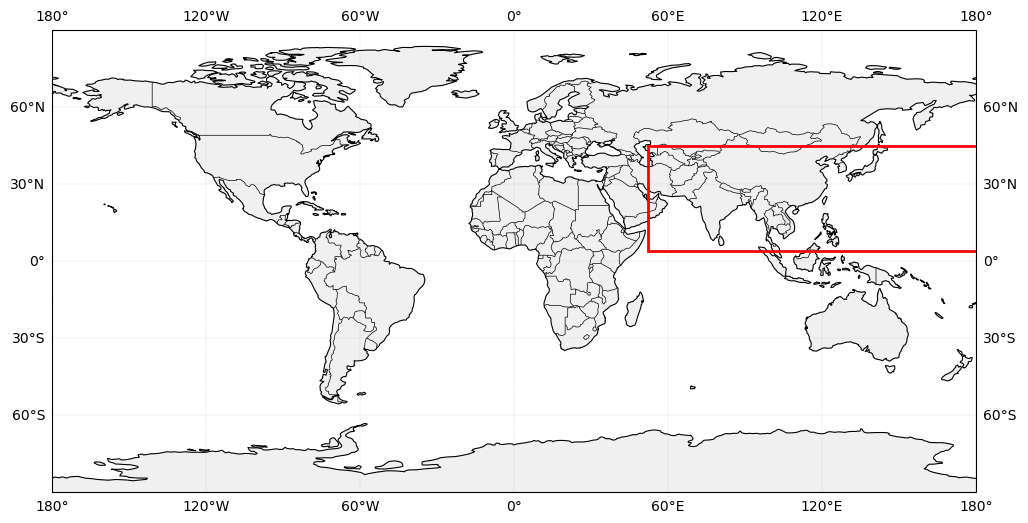

In [20]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent and features
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

major = "-"
lw = 2
color='red'
zorder=5

# 7. India
rlats = 4
rlatn = 37
rlonw = 52
rlone = 95
ax.add_patch(Rectangle((rlonw,rlats),abs(abs(rlonw)+abs(rlone)),abs(abs(rlatn)+abs(rlats)),
              linestyle=major,facecolor='none',edgecolor=color,linewidth=lw,zorder=zorder))